In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [122]:
# allow all columns to be displayed
pd.set_option('display.max_columns', None)

In [135]:
#set seaborn plotting aesthetics
sns.set(style='white')
sns.set_context('notebook')
palette = sns.color_palette("colorblind")

In [123]:
# upload csv file with the survey responses
outreach = pd.read_csv('./Data/ARISE - outreach.csv')

### Set up code for analysis

In [62]:
def strip_string(text):
    text = text.strip(',')
    text = text.strip()
    return text

In [63]:
def return_num(text):
    zip_list = re.findall('[0-9]+', text)
    return zip_list

In [64]:
def return_digits(text):
    text = re.findall(r'\d+', text)
    text = ''.join(text)
    return text


### Vaccinations and referrals through time

Grantees were provided funds to help spread COVID vaccinations in their communities. We will be calculating the cumulative total vaccinations accomplished by this program from June 2022 to present time. We will also look at cumulative  referrals that were given by the grantees in the same time period. 

In [147]:
### take 'dateentered' column and convert it to a datetime object to create timeseries
outreach['date']= pd.to_datetime(outreach['dateentered'])

outreach['date'] = outreach['date'].dt.date

outreach['date'].head(2)

0    2022-06-12
1    2022-06-12
Name: date, dtype: object

In [154]:
# Use groupby method to summate total vaccinations and referrals by month

cumsum = outreach.groupby([pd.PeriodIndex(outreach.date, freq='M')]).sum()[['community_vaccinated','connected_wellbeing']]

cumsum = cumsum.cumsum()

cumsum.reset_index(inplace=True)

cumsum

,date,community_vaccinated,connected_wellbeing
0,2022-06,20.0,420.0
1,2022-07,20.0,420.0
2,2022-08,20.0,420.0
3,2022-09,7912.0,4239.0
4,2022-10,7975.0,4687.0
5,2022-11,8319.0,6562.0
6,2022-12,8436.0,6682.0
7,2023-01,8448.0,6831.0
8,2023-02,8506.0,6904.0
9,2023-03,8544.0,7511.0


In [155]:
# rename the dates for the x-axis of our timeseries plot

date_list = ['Jun 2022', 'Jul 2022', 'Aug 2022', 'Sep 2022', 'Oct 2022',
            'Nov 2022', 'Dec 2022', 'Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023', 'May 2023']

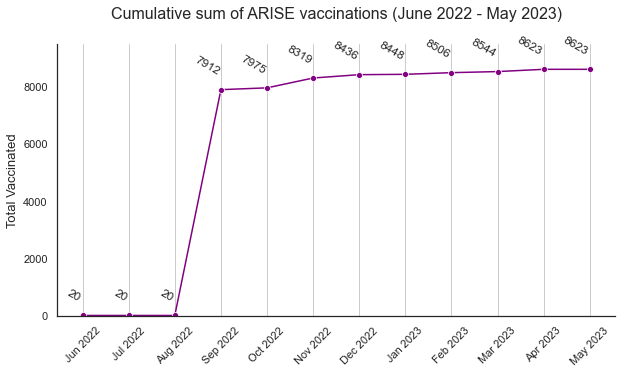

In [157]:
# total vaccinations plot

plt.figure(figsize=(10,5))
ax = sns.lineplot(y=cumsum['community_vaccinated'], 
             x=date_list, 
             data=cumsum,
             ci=False,
             marker='o', 
             color='#800080'
            )
ax.grid(axis='x')
sns.despine(right=True)
plt.ylim(0, 9500)
plt.xlabel('')
plt.ylabel('Total Vaccinated', size=13)
plt.xticks(rotation=45)
plt.title('Cumulative sum of ARISE vaccinations (June 2022 - May 2023)', size=16, pad=25);

for y, x, p in zip(cumsum['community_vaccinated'], range(12),  cumsum['community_vaccinated']):
    p = int(p)
    plt.text(x, y+ 500, p, horizontalalignment='right', rotation=-30)
    
    plt.savefig('./Figures/'+ 'cummulative vaccinations', bbox_inches = 'tight', edgecolor='w')

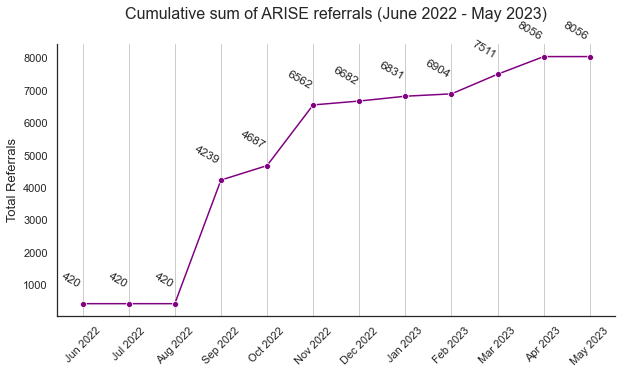

In [158]:
# total referral plot

plt.figure(figsize=(10,5))
ax = sns.lineplot(y=cumsum['connected_wellbeing'], 
             x=date_list, 
             data=cumsum,
             ci=False,
             marker='o', 
             color='#800080'
            )
ax.grid(axis='x')
sns.despine(right=True)
#plt.ylim(0, 25000)
plt.xlabel('')
plt.ylabel('Total Referrals', size=13)
plt.xticks(rotation=45)
plt.title('Cumulative sum of ARISE referrals (June 2022 - May 2023)', size=16, pad=25);

for y, x, p in zip(cumsum['connected_wellbeing'], range(12),  cumsum['connected_wellbeing']):
    p = int(p)
    plt.text(x, y+ 500, p, horizontalalignment='right', rotation=-30)
    
    plt.savefig('./Figures/'+ 'cummulative referrals', bbox_inches = 'tight', edgecolor='w')